In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [3]:
data = pd.read_csv('./data/simple_data.csv')
data.head()


,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
0,-2.0,0.0,AMETHYSTS,10002.0,1.0,9996.0,2.0,9995.0,29.0,10004.0,2.0,10005.0,29.0,NaN,NaN,10003.0,0.0
1,-2.0,0.0,STARFRUIT,5002.0,1.0,4997.0,31.0,NaN,NaN,5003.0,31.0,NaN,NaN,NaN,NaN,5002.5,0.0
2,-2.0,100.0,AMETHYSTS,9996.0,2.0,9995.0,22.0,NaN,NaN,10004.0,2.0,10005.0,22.0,NaN,NaN,10000.0,0.0
3,-2.0,100.0,STARFRUIT,4997.0,24.0,NaN,NaN,NaN,NaN,5003.0,2.0,5004.0,22.0,NaN,NaN,5000.0,0.0
4,-2.0,200.0,STARFRUIT,4997.0,2.0,4996.0,20.0,NaN,NaN,5003.0,20.0,NaN,NaN,NaN,NaN,5000.0,0.0


In [4]:
starfruit_data = data[data['product'] == 'STARFRUIT']
amethyst_data = data[data['product'] == 'AMETHYSTS']

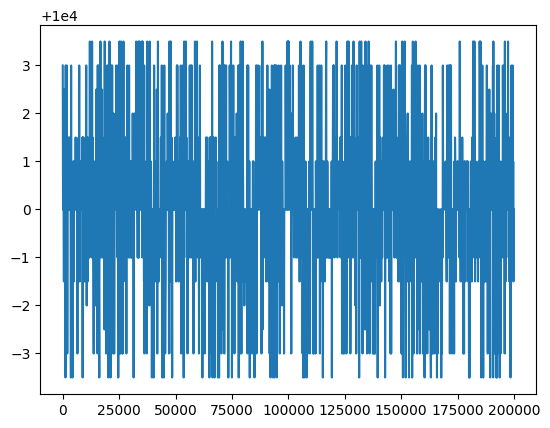

In [5]:
plt.plot(amethyst_data['timestamp'], amethyst_data['mid_price'])

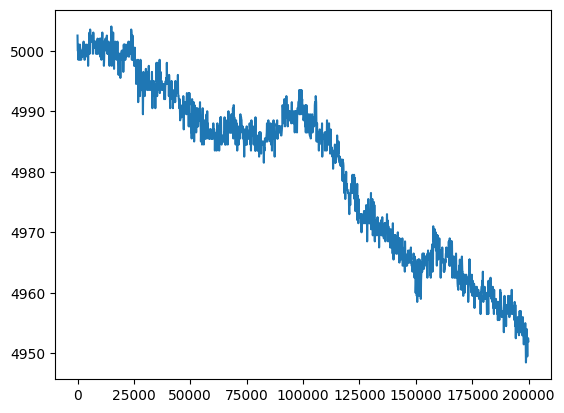

In [6]:
plt.plot(starfruit_data['timestamp'], starfruit_data['mid_price'])

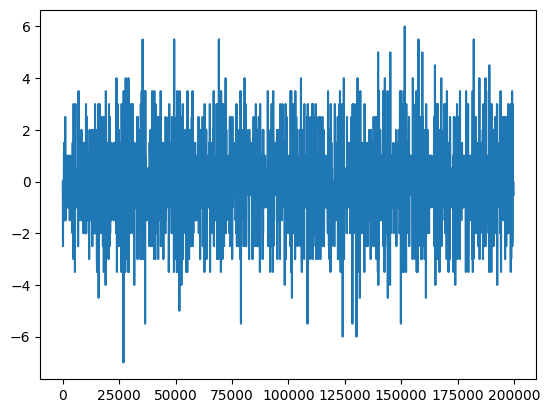

In [7]:
mid_price_diff = starfruit_data['mid_price'].diff()
mid_price_diff[1] = 0
plt.plot(starfruit_data['timestamp'], mid_price_diff)

-0.02525

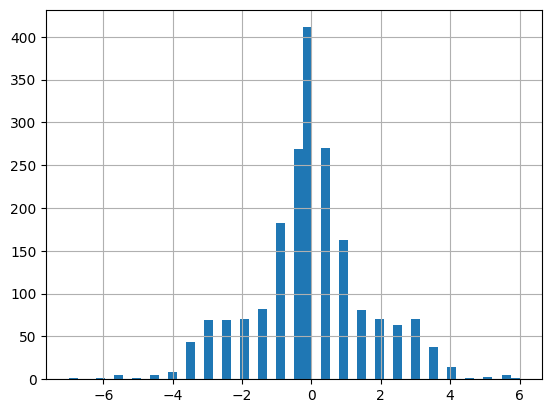

In [8]:
mid_price_diff.hist(bins=50)
mid_price_diff.mean()

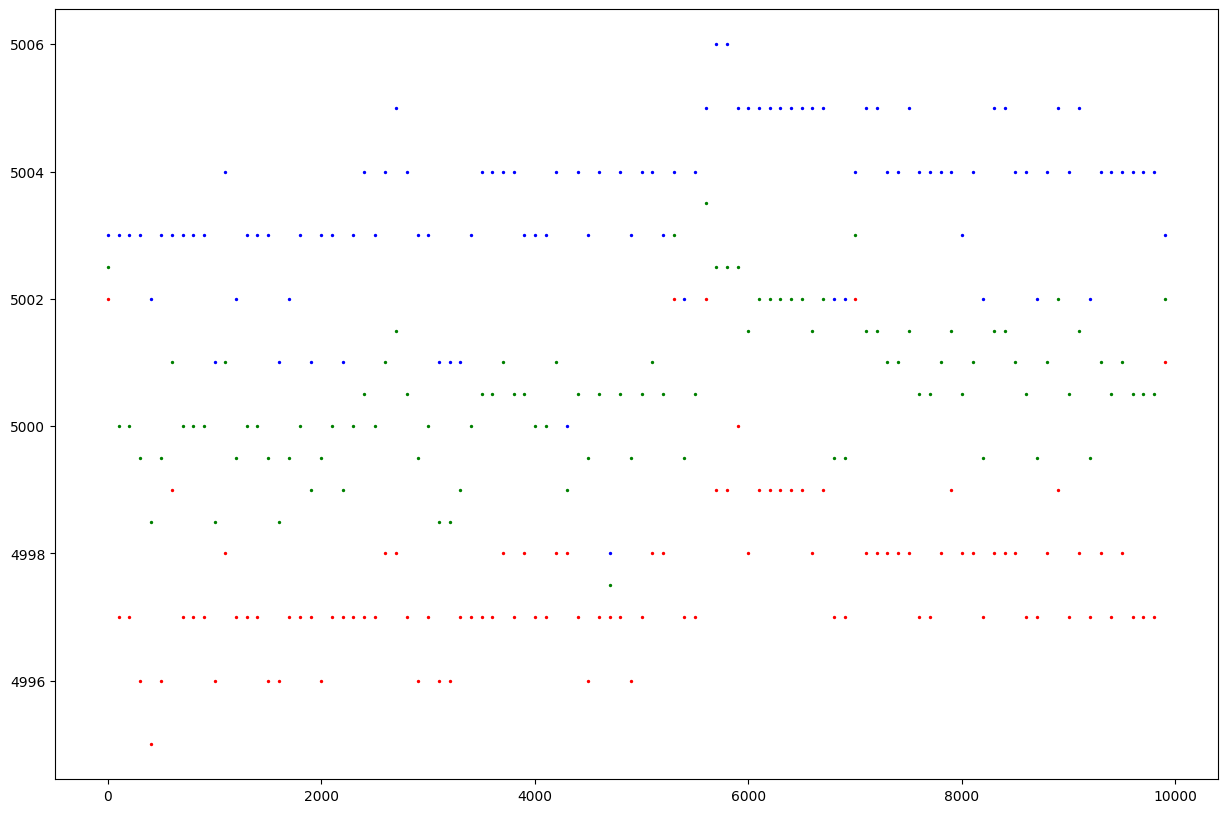

In [59]:
max_time = 100
plt.figure(figsize=(15, 10))
plt.scatter(starfruit_data['timestamp'][:max_time], starfruit_data['bid_price_1'][:max_time], color = 'red', s=2)
plt.scatter(starfruit_data['timestamp'][:max_time], starfruit_data['ask_price_1'][:max_time], color = 'blue', s=2)
plt.scatter(starfruit_data['timestamp'][:max_time], starfruit_data['mid_price'][:max_time], color = 'green', s=2)

Ask outliers:  12
Bid outliers:  12


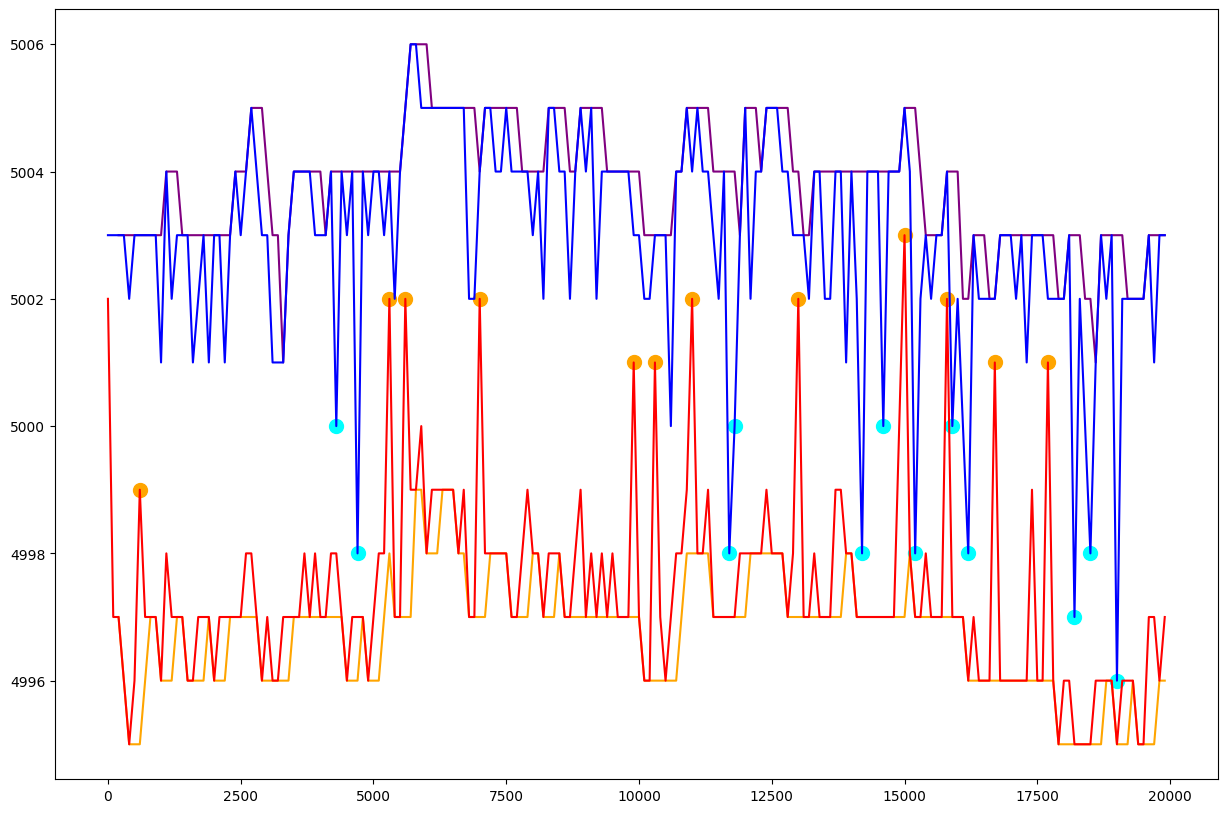

In [134]:
min_time = 000
max_time = 200
plt.figure(figsize=(15, 10))

asks = starfruit_data['ask_price_1'][min_time:max_time]
bids = starfruit_data['bid_price_1'][min_time:max_time]
timestamps = starfruit_data['timestamp'][min_time:max_time]

time_window = 3
min_bid = bids.rolling(window=time_window).min()
max_ask = asks.rolling(window=time_window).max()

plt.plot(timestamps, min_bid, color = 'orange')
plt.plot(timestamps, max_ask, color = 'purple')

margin = 3

ask_outliers = timestamps[asks < max_ask - margin]
bid_outliers = timestamps[bids > min_bid + margin]
# ask_outliers.values

plt.scatter(ask_outliers, asks[asks < max_ask - margin], color = 'aqua', s=100)
plt.scatter(bid_outliers, bids[bids > min_bid + margin], color = 'orange', s=100)

plt.plot(starfruit_data['timestamp'][min_time:max_time], starfruit_data['bid_price_1'][min_time:max_time], color = 'red')
plt.plot(starfruit_data['timestamp'][min_time:max_time], starfruit_data['ask_price_1'][min_time:max_time], color = 'blue')

print("Ask outliers: ", len(ask_outliers))
print("Bid outliers: ", len(bid_outliers))


<Axes: xlabel='Lag', ylabel='Autocorrelation'>

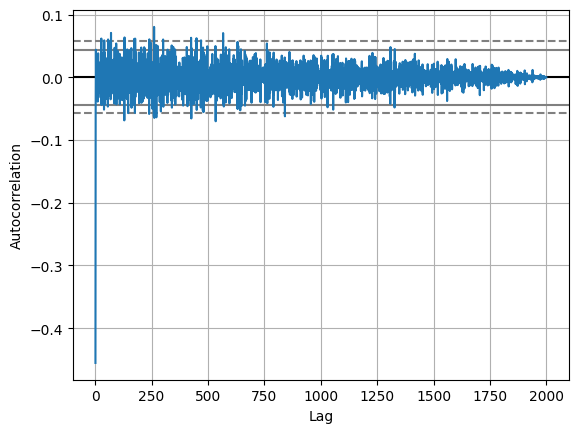

In [10]:
# plot autocorrections for different lags
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(mid_price_diff, ax=plt.gca())

(array([-10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,   1,   2,
          3,   4,   5,   6,   7,   8,   9,  10]),
 array([ 3.14004229e-02,  1.98389491e-02, -2.88811912e-02, -1.79945117e-04,
        -6.74794188e-03,  1.27761033e-02, -1.62850331e-02,  4.40865536e-02,
        -5.15092897e-02, -4.55261145e-01,  1.00000000e+00, -4.55261145e-01,
        -5.15092897e-02,  4.40865536e-02, -1.62850331e-02,  1.27761033e-02,
        -6.74794188e-03, -1.79945117e-04, -2.88811912e-02,  1.98389491e-02,
         3.14004229e-02]),
 <matplotlib.lines.Line2D at 0x70df1e690f70>)

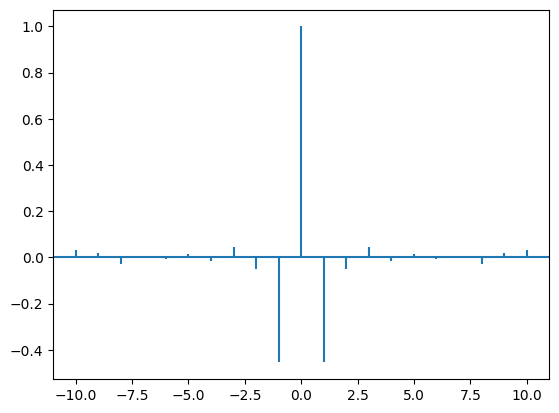

In [11]:
plt.acorr(mid_price_diff, maxlags=10)


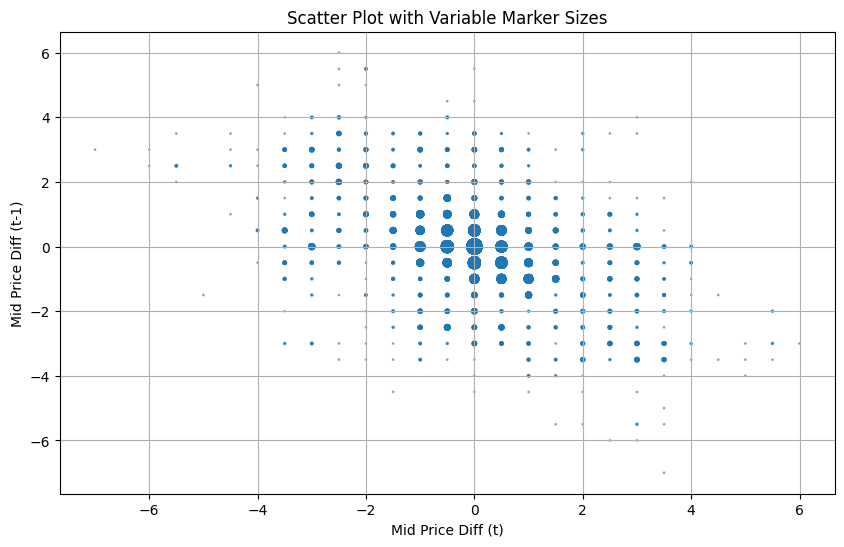

In [12]:
# plot the next diff against the current diff
x = mid_price_diff[1:]
y = mid_price_diff[:-1]

# Calculate the frequencies of each unique point pair
counts = {}
for point in zip(x, y):
    if point in counts:
        counts[point] += 1
    else:
        counts[point] = 1

sizes = []
for point in zip(x, y):
    sizes.append(counts[point])
    
# Plot scatter with different marker sizes
plt.figure(figsize=(10, 6))
plt.scatter(x, y, s=sizes, alpha=0.5)

plt.title('Scatter Plot with Variable Marker Sizes')
plt.xlabel('Mid Price Diff (t)')
plt.ylabel('Mid Price Diff (t-1)')
plt.grid(True)

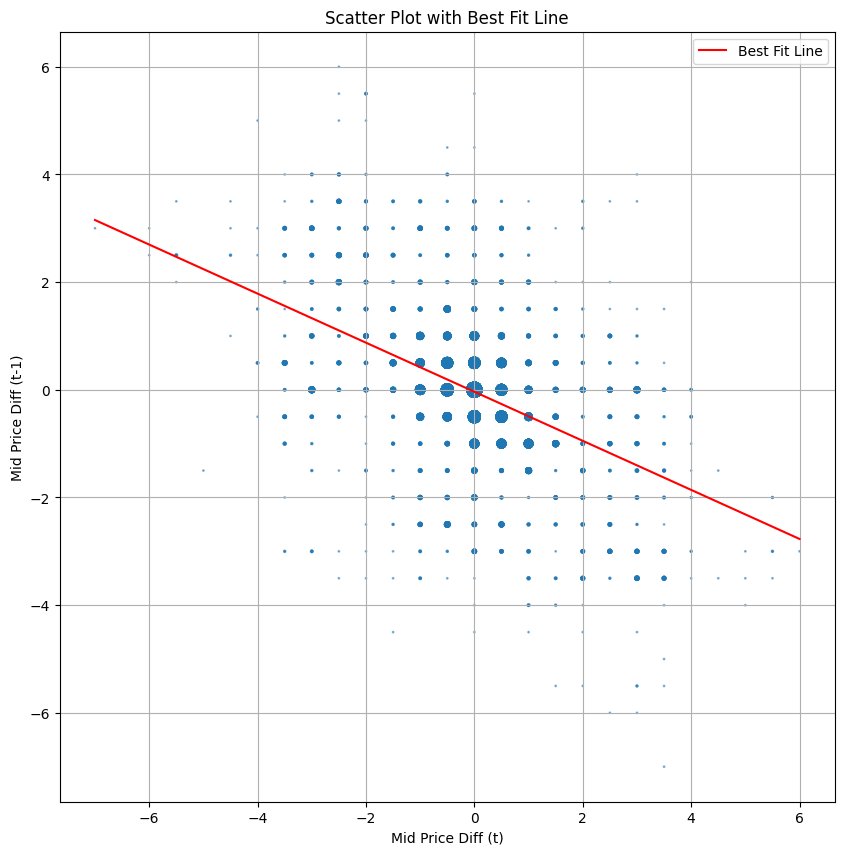

array([-0.45559303])

In [13]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(np.array(x).reshape(-1, 1), y)
xfit = np.linspace(min(x), max(x), 1000)
yfit = model.predict(xfit[:, np.newaxis])

# Plot scatter with different marker sizes
plt.figure(figsize=(10, 10))
plt.scatter(x, y, s=sizes, alpha=0.5)
plt.plot(xfit, yfit, color='red', label='Best Fit Line')

plt.title('Scatter Plot with Best Fit Line')
plt.xlabel('Mid Price Diff (t)')
plt.ylabel('Mid Price Diff (t-1)')
plt.legend()
plt.grid(True)
plt.show()

model.coef_

In [14]:
rdata = pd.read_csv('./data/r_trader_data.csv', delimiter=';')
rdata.head()

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
0,-2,0,AMETHYSTS,10002,1,9996.0,2.0,9995.0,29.0,10004,2,10005.0,29.0,NaN,NaN,10003.0,0.0
1,-2,0,STARFRUIT,5002,1,4997.0,31.0,NaN,NaN,5003,31,NaN,NaN,NaN,NaN,5002.5,0.0
2,-2,100,AMETHYSTS,9996,2,9995.0,22.0,NaN,NaN,10004,2,10005.0,22.0,NaN,NaN,10000.0,0.0
3,-2,100,STARFRUIT,4997,24,NaN,NaN,NaN,NaN,5003,2,5004.0,22.0,NaN,NaN,5000.0,0.0
4,-2,200,STARFRUIT,4997,2,4996.0,20.0,NaN,NaN,5003,20,NaN,NaN,NaN,NaN,5000.0,0.0


In [15]:
st_rdata = rdata[rdata['product'] == 'STARFRUIT']

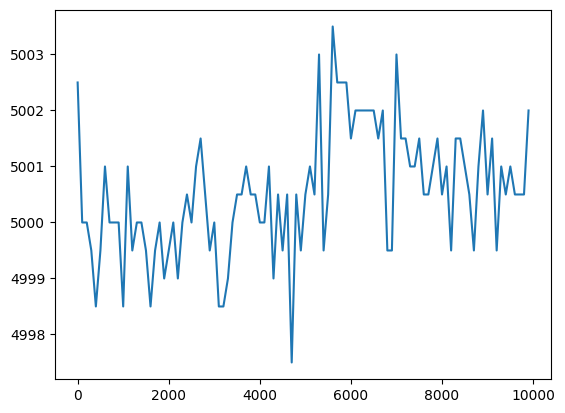

In [57]:
plt.plot(st_rdata['timestamp'][:100], st_rdata['mid_price'][:100])
rmp_diff = st_rdata['mid_price'].diff()
rmp_diff[1] = 0

(array([-10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,   1,   2,
          3,   4,   5,   6,   7,   8,   9,  10]),
 array([ 3.14004229e-02,  1.98389491e-02, -2.88811912e-02, -1.79945117e-04,
        -6.74794188e-03,  1.27761033e-02, -1.62850331e-02,  4.40865536e-02,
        -5.15092897e-02, -4.55261145e-01,  1.00000000e+00, -4.55261145e-01,
        -5.15092897e-02,  4.40865536e-02, -1.62850331e-02,  1.27761033e-02,
        -6.74794188e-03, -1.79945117e-04, -2.88811912e-02,  1.98389491e-02,
         3.14004229e-02]),
 <matplotlib.lines.Line2D at 0x70defee2f3a0>)

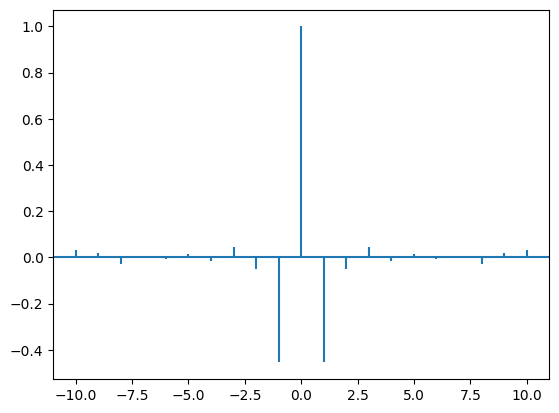

In [17]:
plt.acorr(rmp_diff, maxlags=10)

array([-0.45559303])

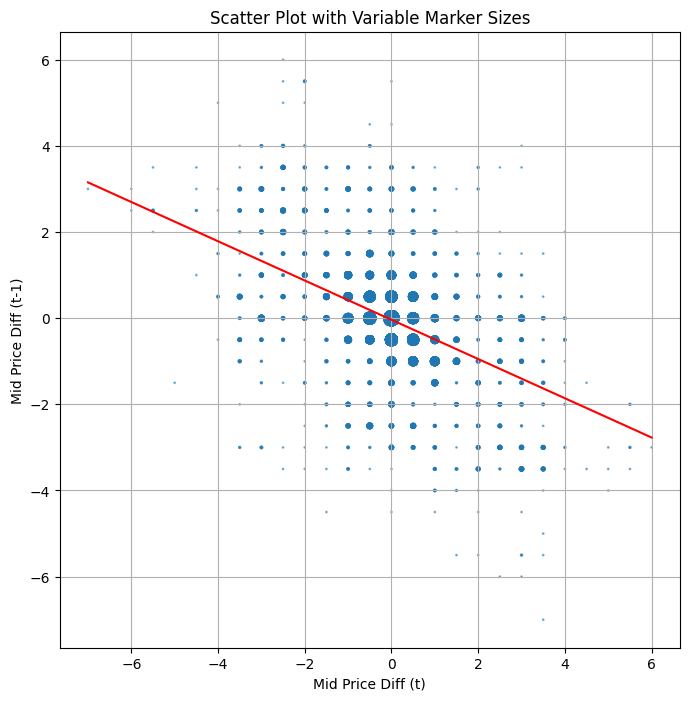

In [18]:
# plot the next diff against the current diff
x = mid_price_diff[1:]
y = mid_price_diff[:-1]

# Calculate the frequencies of each unique point pair
counts = {}
for point in zip(x, y):
    if point in counts:
        counts[point] += 1
    else:
        counts[point] = 1

sizes = []
for point in zip(x, y):
    sizes.append(counts[point])
    
# Plot scatter with different marker sizes
plt.figure(figsize=(8, 8))
plt.scatter(x, y, s=sizes, alpha=0.5)

model = LinearRegression()
model.fit(np.array(x).reshape(-1, 1), y)
xfit = np.linspace(min(x), max(x), 1000)
yfit = model.predict(xfit[:, np.newaxis])
plt.plot(xfit, yfit, color='red', label='Best Fit Line')


plt.title('Scatter Plot with Variable Marker Sizes')
plt.xlabel('Mid Price Diff (t)')
plt.ylabel('Mid Price Diff (t-1)')
plt.grid(True)

model.coef_

array([-0.47208981])

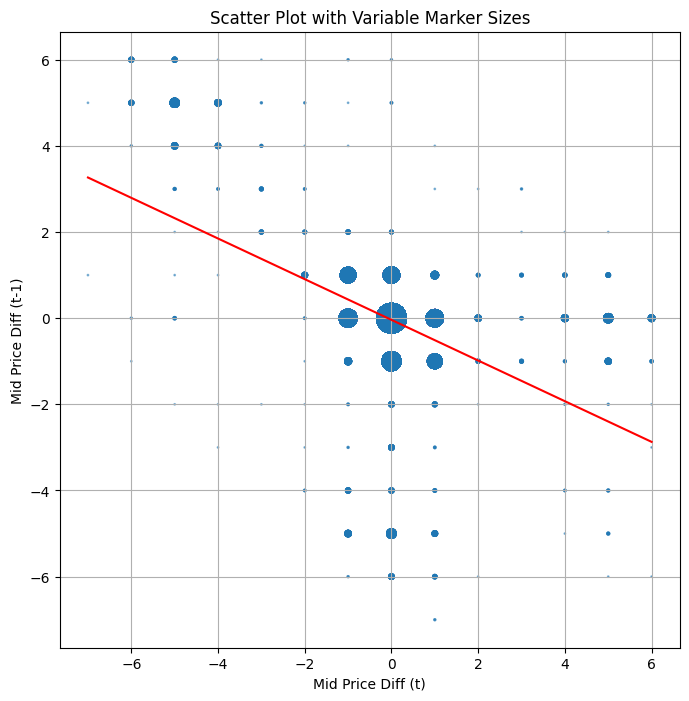

In [24]:
bid_price_diff = starfruit_data['bid_price_1'].diff()

bid_price_diff.fillna(0, inplace=True)

# plot the next diff against the current diff
x = bid_price_diff[1:]
y = bid_price_diff[:-1]

# Calculate the frequencies of each unique point pair
counts = {}
for point in zip(x, y):
    if point in counts:
        counts[point] += 1
    else:
        counts[point] = 1

sizes = []
for point in zip(x, y):
    sizes.append(counts[point])
    
# Plot scatter with different marker sizes
plt.figure(figsize=(8, 8))
plt.scatter(x, y, s=sizes, alpha=0.5)

model = LinearRegression()
model.fit(np.array(x).reshape(-1, 1), y)
xfit = np.linspace(min(x), max(x), 1000)
yfit = model.predict(xfit[:, np.newaxis])
plt.plot(xfit, yfit, color='red', label='Best Fit Line')


plt.title('Scatter Plot with Variable Marker Sizes')
plt.xlabel('Mid Price Diff (t)')
plt.ylabel('Mid Price Diff (t-1)')
plt.grid(True)

model.coef_

(array([-10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,   1,   2,
          3,   4,   5,   6,   7,   8,   9,  10]),
 array([ 0.01692308,  0.01615385, -0.02065934,  0.00626374, -0.01395604,
         0.02318681, -0.02857143,  0.02879121, -0.02505495, -0.47186813,
         1.        , -0.47186813, -0.02505495,  0.02879121, -0.02857143,
         0.02318681, -0.01395604,  0.00626374, -0.02065934,  0.01615385,
         0.01692308]),
 <matplotlib.lines.Line2D at 0x70df676484f0>)

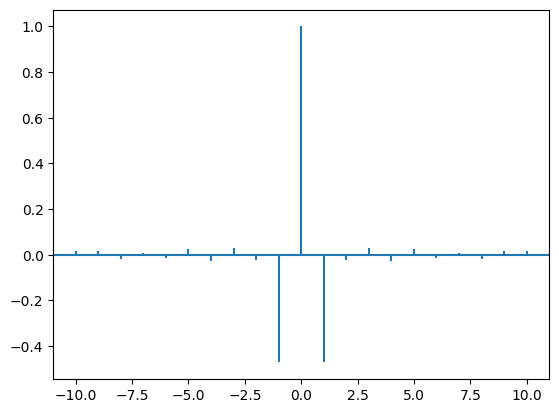

In [22]:
bid_price_diff = starfruit_data['bid_price_1'].diff()
bid_price_diff[1] = 0
plt.acorr(bid_price_diff, maxlags=10)

In [26]:
# 1 1 0 1 0 1 0 1 0 0 1 0 1 0 1 
# 1 0 1 0 1 0 1 0

In [27]:
len(bid_price_diff)

2000

In [31]:
vec = [(-1)**i for i in range(len(bid_price_diff))]
# 
np.corrcoef(bid_price_diff[:-2], bid_price_diff[2:])

array([[ 1.       , -0.0252315],
       [-0.0252315,  1.       ]])

2.1334478666936962

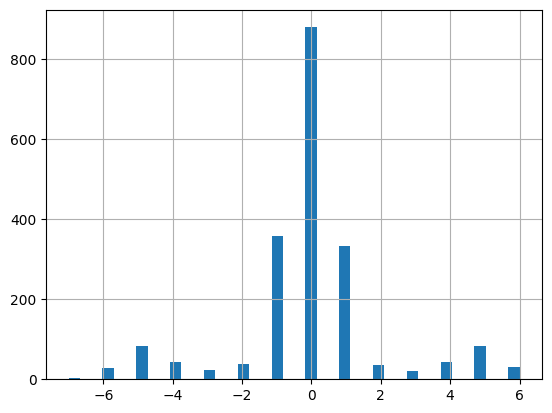

In [35]:
bid_price_diff.hist(bins=40)
bid_price_diff.std()

In [54]:
bids = starfruit_data['bid_price_1'].values
asks = starfruit_data['ask_price_1'].values

print(np.sum((bids[:-1] > asks[1:])))

print(np.sum(asks[:-1] < bids[1:]))

21
24


In [56]:
steps_back = 10
steps_forward = 6

X = [bid_price_diff[i:i+steps_back].values for i in range(len(bid_price_diff) - steps_back - steps_forward)]
Y = [bid_price_diff[i:i+steps_forward].values for i in range(steps_back, len(bid_price_diff) - steps_back - steps_forward)]

X

[array([ 0., -5.,  0., -1., -1.,  1.,  3., -2.,  0.,  0.]),
 array([-5.,  0., -1., -1.,  1.,  3., -2.,  0.,  0., -1.]),
 array([ 0., -1., -1.,  1.,  3., -2.,  0.,  0., -1.,  2.]),
 array([-1., -1.,  1.,  3., -2.,  0.,  0., -1.,  2., -1.]),
 array([-1.,  1.,  3., -2.,  0.,  0., -1.,  2., -1.,  0.]),
 array([ 1.,  3., -2.,  0.,  0., -1.,  2., -1.,  0.,  0.]),
 array([ 3., -2.,  0.,  0., -1.,  2., -1.,  0.,  0., -1.]),
 array([-2.,  0.,  0., -1.,  2., -1.,  0.,  0., -1.,  0.]),
 array([ 0.,  0., -1.,  2., -1.,  0.,  0., -1.,  0.,  1.]),
 array([ 0., -1.,  2., -1.,  0.,  0., -1.,  0.,  1.,  0.]),
 array([-1.,  2., -1.,  0.,  0., -1.,  0.,  1.,  0.,  0.]),
 array([ 2., -1.,  0.,  0., -1.,  0.,  1.,  0.,  0., -1.]),
 array([-1.,  0.,  0., -1.,  0.,  1.,  0.,  0., -1.,  1.]),
 array([ 0.,  0., -1.,  0.,  1.,  0.,  0., -1.,  1.,  0.]),
 array([ 0., -1.,  0.,  1.,  0.,  0., -1.,  1.,  0.,  0.]),
 array([-1.,  0.,  1.,  0.,  0., -1.,  1.,  0.,  0.,  0.]),
 array([ 0.,  1.,  0.,  0., -1.,  1.,  0

Ask outliers:  13
Bid outliers:  15


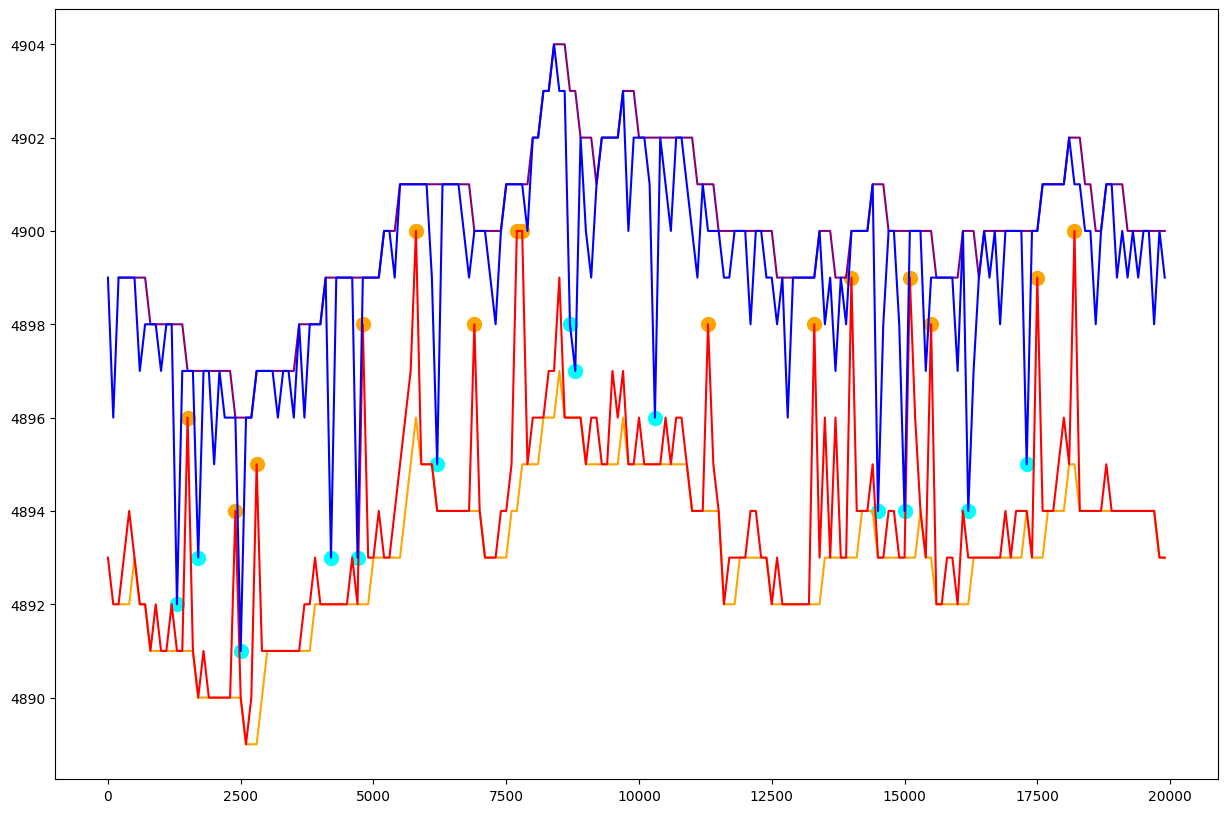

In [138]:
bananas_data = pd.read_csv('./backtest/training/prices_round_1_day_0.csv', delimiter=';')
bananas_data = bananas_data[bananas_data['product'] == 'BANANAS']

min_time = 000
max_time = 200
plt.figure(figsize=(15, 10))

asks = bananas_data['ask_price_1'][min_time:max_time]
bids = bananas_data['bid_price_1'][min_time:max_time]
timestamps = bananas_data['timestamp'][min_time:max_time]

time_window = 3
min_bid = bids.rolling(window=time_window).min()
max_ask = asks.rolling(window=time_window).max()

plt.plot(timestamps, min_bid, color = 'orange')
plt.plot(timestamps, max_ask, color = 'purple')

margin = 3

ask_outliers = timestamps[asks < max_ask - margin]
bid_outliers = timestamps[bids > min_bid + margin]
# ask_outliers.values

plt.scatter(ask_outliers, asks[asks < max_ask - margin], color = 'aqua', s=100)
plt.scatter(bid_outliers, bids[bids > min_bid + margin], color = 'orange', s=100)

plt.plot(bananas_data['timestamp'][min_time:max_time], bananas_data['bid_price_1'][min_time:max_time], color = 'red')
plt.plot(bananas_data['timestamp'][min_time:max_time], bananas_data['ask_price_1'][min_time:max_time], color = 'blue')

print("Ask outliers: ", len(ask_outliers))
print("Bid outliers: ", len(bid_outliers))
